In [1]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('/Users/sivaprasanth/Documents/Computer Vision/Computer-Vision/img/document_image.jpg')

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

edges = cv2.Canny(blurred, 50, 150)

In [4]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
    
    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 3)

In [5]:
extracted_text = pytesseract.image_to_string(gray)

Extracted Text: 
 afafi ZEMR

NON-DISCLOSURE AGREEMENT

This Non-Disclosure and Confidentiality Agreement (this
“Agreement”) is entered into as of {$day}, 20{$year_short} by and
between ZEMR, as a(n) © Individual O Business Entity (“Disclosing
Party”) and {$company}, as a(n) © Individual O Business Entity
(“Receiving Party”).

Disclosing Party and Receiving Party have indicated an interest in
exploring a potential business relationship (the “Transaction”).

In connection with the parties’ respective evaluation of the
Transaction, each party, their respective affiliates and their respective
directors, officers, employees, agents or advisors (collectively,
“Representatives”) may provide or grant access to certain confidential
and proprietary. A party disclosing its Confidential Information to the
other party is hereafter referred to as a “Disclosing Party.” A party
receiving the Confidential Information of a Disclosing Party is
hereafter referred to as a “Receiving Party.”

Receiving Par

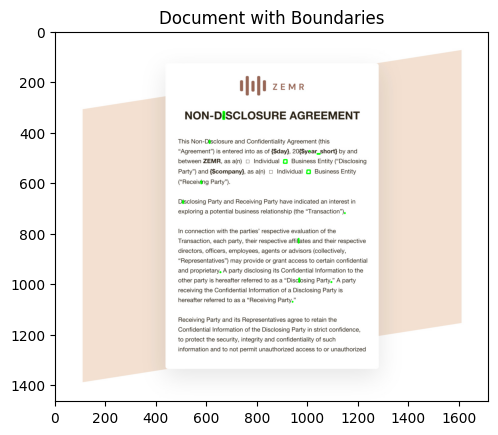

In [6]:
plt.title("Document with Boundaries")
plt.imshow(image)
print("Extracted Text: \n", extracted_text)